# Karaoke Recommender

### DATA DICTIONARY

id (string)
>The Spotify ID for the track.

acousticness (float)
>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

analysis_url (string)	
>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.

danceability (float)	
>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

duration_ms (int)	
>The duration of the track in milliseconds.

energy (float)	
>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness (float)
>Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key (int)	
>The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

liveness (float)
>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness (float)
>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

mode (int)	
>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness (float)	
>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo (float)	
>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
time_signature	int	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

track_href (string)	
>A link to the Web API endpoint providing full details of the track.

type (string)	
>The object type: "audio_features"

valence	(float)	
>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [2]:
import pandas as pd
import numpy as np

In [3]:
tks4 = pd.read_pickle('tks4.p')

In [4]:
tks4.head()

Artist                Title                      id  \
0                        Frozen            Let It Go  0qcr5FMsEO85NAQjrlDRKo   
1             Pharrell Williams                Happy  6NPVjNh8Jhru9xOmyQigds   
2  Mark Ronson feat. Bruno Mars          Uptown Funk  5MjukdbL11ysj7TnEM2GPn   
3                  Taylor Swift         Shake It off  1j2sRZpFUzG6wPJGfRvet3   
4                Meghan Trainor  All About That Bass  0ifSeVGUr7py5GggttDhXw   

  popularity  
0         65  
1         74  
2         10  
3         49  
4         70

In [6]:
tks = tks4[tks4['Title'].str.contains("nan") == False]

In [7]:
tks.reset_index(drop=True, inplace=True)

In [8]:
tks = tks[tks['id'].str.contains('nan')==False]

USE ID TO GET AUDIO FEATURES FOR EACH SONG

In [9]:
# Get features for each song in tks

from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys

client_credentials_manager = SpotifyClientCredentials(client_id='9342202d7b4640c8aa49d83b62b570ba', client_secret = '9c08dfa4279348dda0d13d410a762728')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

features = tks["id"].map(lambda x: sp.audio_features([x]))

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [10]:
features.head()

0    [{u'track_href': u'https://api.spotify.com/v1/...
1    [{u'track_href': u'https://api.spotify.com/v1/...
2    [{u'track_href': u'https://api.spotify.com/v1/...
3    [{u'track_href': u'https://api.spotify.com/v1/...
4    [{u'track_href': u'https://api.spotify.com/v1/...
Name: id, dtype: object

CONVERT & MERGE TO ONE DATAFRAME

In [11]:
f =[]
for d in features:
    for l in d:
        f.append(l)

In [12]:
f

[{u'acousticness': 0.556,
  u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/0qcr5FMsEO85NAQjrlDRKo',
  u'danceability': 0.539,
  u'duration_ms': 223840,
  u'energy': 0.488,
  u'id': u'0qcr5FMsEO85NAQjrlDRKo',
  u'instrumentalness': 0,
  u'key': 8,
  u'liveness': 0.122,
  u'loudness': -6.864,
  u'mode': 1,
  u'speechiness': 0.0318,
  u'tempo': 137.073,
  u'time_signature': 4,
  u'track_href': u'https://api.spotify.com/v1/tracks/0qcr5FMsEO85NAQjrlDRKo',
  u'type': u'audio_features',
  u'uri': u'spotify:track:0qcr5FMsEO85NAQjrlDRKo',
  u'valence': 0.373},
 {u'acousticness': 0.286,
  u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/6NPVjNh8Jhru9xOmyQigds',
  u'danceability': 0.652,
  u'duration_ms': 233305,
  u'energy': 0.757,
  u'id': u'6NPVjNh8Jhru9xOmyQigds',
  u'instrumentalness': 0,
  u'key': 1,
  u'liveness': 0.0886,
  u'loudness': -6.819,
  u'mode': 1,
  u'speechiness': 0.153,
  u'tempo': 159.911,
  u'time_signature': 4,
  u'track_href': u'https://api.spotif

In [13]:
# convert features to dataframe
af = pd.DataFrame(f)

In [14]:
af

acousticness                                       analysis_url  \
0         0.556000  https://api.spotify.com/v1/audio-analysis/0qcr...   
1         0.286000  https://api.spotify.com/v1/audio-analysis/6NPV...   
2         0.041700  https://api.spotify.com/v1/audio-analysis/5Mju...   
3         0.003100  https://api.spotify.com/v1/audio-analysis/1j2s...   
4         0.047600  https://api.spotify.com/v1/audio-analysis/0ifS...   
5         0.474000  https://api.spotify.com/v1/audio-analysis/34gC...   
6         0.921000  https://api.spotify.com/v1/audio-analysis/2muX...   
7         0.568000  https://api.spotify.com/v1/audio-analysis/5Db9...   
8         0.850000  https://api.spotify.com/v1/audio-analysis/2yi7...   
9         0.622000  https://api.spotify.com/v1/audio-analysis/0ej0...   
10        0.250000  https://api.spotify.com/v1/audio-analysis/77NN...   
11        0.162000  https://api.spotify.com/v1/audio-analysis/3s4U...   
12        0.639000  https://api.spotify.com/v1/audio-analysis/3VTN...   
13        0.505000  https://api.spotify.com/v1/audio-analysis/6l7t...   
14        0.831000  https://api.spotify.com/v1/audio-analysis/1hwd...   
15        0.577000  https://api.spotify.com/v1/audio-analysis/1hBu...   
16        0.032200  https://api.spotify.com/v1/audio-analysis/33NH...   
17        0.000453  https://api.spotify.com/v1/audio-analysis/5wj4...   
18        0.146000  https://api.spotify.com/v1/audio-analysis/2XPc...   
19        0.022500  https://api.spotify.com/v1/audio-analysis/1OtW...   
20        0.005030  https://api.spotify.com/v1/audio-analysis/6QUv...   
21        0.048800  https://api.spotify.com/v1/audio-analysis/7hQJ...   
22        0.590000  https://api.spotify.com/v1/audio-analysis/5k3U...   
23        0.566000  https://api.spotify.com/v1/audio-analysis/2SpE...   
24        0.408000  https://api.spotify.com/v1/audio-analysis/6lTT...   
25        0.416000  https://api.spotify.com/v1/audio-analysis/4w3t...   
26        0.046400  https://api.spotify.com/v1/audio-analysis/2Fic...   
27        0.163000  https://api.spotify.com/v1/audio-analysis/7CKb...   
28        0.701000  https://api.spotify.com/v1/audio-analysis/5ts8...   
29        0.031900  https://api.spotify.com/v1/audio-analysis/1z3Q...   
...            ...                                                ...   
3843      0.750000  https://api.spotify.com/v1/audio-analysis/0XIe...   
3844      0.273000  https://api.spotify.com/v1/audio-analysis/4tED...   
3845      0.712000  https://api.spotify.com/v1/audio-analysis/1n8R...   
3846      0.487000  https://api.spotify.com/v1/audio-analysis/3DOh...   
3847      0.844000  https://api.spotify.com/v1/audio-analysis/3dOi...   
3848      0.010800  https://api.spotify.com/v1/audio-analysis/2aId...   
3849      0.024700  https://api.spotify.com/v1/audio-analysis/20VE...   
3850      0.449000  https://api.spotify.com/v1/audio-analysis/5nOv...   
3851      0.027100  https://api.spotify.com/v1/audio-analysis/1GCb...   
3852      0.206000  https://api.spotify.com/v1/audio-analysis/0lj2...   
3853      0.145000  https://api.spotify.com/v1/audio-analysis/71iC...   
3854      0.689000  https://api.spotify.com/v1/audio-analysis/0AEC...   
3855      0.185000  https://api.spotify.com/v1/audio-analysis/6LR5...   
3856      0.574000  https://api.spotify.com/v1/audio-analysis/2vXk...   
3857      0.017600  https://api.spotify.com/v1/audio-analysis/4PYi...   
3858      0.689000  https://api.spotify.com/v1/audio-analysis/5jGW...   
3859      0.220000  https://api.spotify.com/v1/audio-analysis/6wNe...   
3860      0.266000  https://api.spotify.com/v1/audio-analysis/1cdz...   
3861      0.214000  https://api.spotify.com/v1/audio-analysis/3Ivy...   
3862      0.946000  https://api.spotify.com/v1/audio-analysis/6RGw...   
3863      0.023000  https://api.spotify.com/v1/audio-analysis/2UVL...   
3864      0.520000  https://api.spotify.com/v1/audio-analysis/252Y...   
3865      0.224000  https://api.spotify.com/v1/audio-analysis/2z

In [15]:
# Join dataframe tks (karaoke songs) and dataframe features on id
af = pd.merge(tks,af, on=['id','id'])

In [16]:
af.head()

Artist      Title                      id popularity  \
0             Frozen  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
1             Frozen  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
2       Idina Menzel  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
3       Idina Menzel  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
4  Pharrell Williams      Happy  6NPVjNh8Jhru9xOmyQigds         74   

   acousticness                                       analysis_url  \
0         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
1         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
2         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
3         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
4         0.286  https://api.spotify.com/v1/audio-analysis/6NPV...   

   danceability  duration_ms  energy  instrumentalness   ...    liveness  \
0         0.539       223840   0.488               0.0   ...      0.1220   
1         0.539       223840   0.488               0.0   ...      0.1220   
2         0.539       223840   0.488               0.0   ...      0.1220   
3         0.539       223840   0.488               0.0   ...      0.1220   
4         0.652       233305   0.757               0.0   ...      0.0886   

   loudness  mode  speechiness    tempo  time_signature  \
0    -6.864     1       0.0318  137.073               4   
1    -6.864     1       0.0318  137.073               4   
2    -6.864     1       0.0318  137.073               4   
3    -6.864     1       0.0318  137.073               4   
4    -6.819     1       0.1530  159.911               4   

                                          track_href            type  \
0  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
1  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
2  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
3  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
4  https://api.spotify.com/v1/tracks/6NPVjNh8Jhru...  audio_features   

                                    uri valence  
0  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
1  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
2  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
3  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
4  spotify:track:6NPVjNh8Jhru9xOmyQigds   0.962  

[5 rows x 21 columns]

In [17]:
af.drop_duplicates('id', inplace=True)

In [18]:
af.reset_index(drop=True, inplace=True)

In [19]:
af[af.duplicated('Title')].sort_values(by='Title').head()

Artist                                    Title  \
2459  Michelle Simonal            (I Can't Get No) Satisfaction   
2585       Carole King  (You Make Me Feel Like) A Natural Woman   
3710         Junkie XL               A Little Less Conversation   
3545    Kelly Clarkson                       A Moment Like This   
1238        Joe Cocker                   A Whiter Shade of Pale   

                          id popularity  acousticness  \
2459  5KGkkqaXYVcvKY3XaRdBaK         40       0.47100   
2585  0LXljhKMUgoLv8tLwZ1hmf         55       0.95300   
3710  49Mxveaa2JBEA55DLiuYix         11       0.00146   
3545  4kvdX9zzsix7jYHsRVkVUH         54       0.16300   
1238  1kU9hMMuf2JV08OpuwIVWq         20       0.12300   

                                           analysis_url  danceability  \
2459  https://api.spotify.com/v1/audio-analysis/5KGk...         0.847   
2585  https://api.spotify.com/v1/audio-analysis/0LXl...         0.624   
3710  https://api.spotify.com/v1/audio-analysis/49Mx...         0.590   
3545  https://api.spotify.com/v1/audio-analysis/4kvd...         0.414   
1238  https://api.spotify.com/v1/audio-analysis/1kU9...         0.387   

      duration_ms  energy  instrumentalness   ...    liveness  loudness  mode  \
2459       212027   0.446           0.04150   ...      0.2690   -11.573     1   
2585       229067   0.158           0.00135   ...      0.1120   -13.059     1   
3710       222232   0.957           0.00121   ...      0.1080    -5.494     1   
3545       228280   0.572           0.00000   ...      0.1150    -3.918     1   
1238       322826   0.403           0.04790   ...      0.0623    -9.334     1   

      speechiness    tempo  time_signature  \
2459       0.0584  119.990               4   
2585       0.0289   85.492               3   
3710       0.1040  130.026               4   
3545       0.0311  145.184               4   
1238       0.0260  172.992               3   

                                             track_href            type  \
2459  https://api.spotify.com/v1/tracks/5KGkkqaXYVcv...  audio_features   
2585  https://api.spotify.com/v1/tracks/0LXljhKMUgoL...  audio_features   
3710  https://api.spotify.com/v1/tracks/49Mxveaa2JBE...  audio_features   
3545  https://api.spotify.com/v1/tracks/4kvdX9zzsix7...  audio_features   
1238  https://api.spotify.com/v1/tracks/1kU9hMMuf2JV...  audio_features   

                                       uri valence  
2459  spotify:track:5KGkkqaXYVcvKY3XaRdBaK   0.581  
2585  spotify:track:0LXljhKMUgoLv8tLwZ1hmf   0.291  
3710  spotify:track:49Mxveaa2JBEA55DLiuYix   0.755  
3545  spotify:track:4kvdX9zzsix7jYHsRVkVUH   0.154  
1238  spotify:track:1kU9hMMuf2JV08OpuwIVWq   0.147  

[5 rows x 21 columns]

In [20]:
# pickle dataframe
import pickle

with open('karaoke_songs4.pkl', 'w') as ks:
    pickle.dump(af, ks)

In [21]:
# open pickled dataframe
with open('karaoke_songs4.pkl', 'r') as ks:
    af = pickle.load(ks)

In [23]:
# strip spaces
af['Title'] = af['Title'].str.strip()
af['Artist'] = af['Artist'].str.strip()

In [24]:
# check unique values for column 'type'
af['type'].unique()

array([u'audio_features'], dtype=object)

In [25]:
# check unique values for column 'mode'
af['mode'].unique()

array([1, 0])

In [26]:
# drop columns ('analysis_url','track_href','type','uri')
af.drop(['analysis_url','track_href','type','uri'],axis=1,inplace=True)

In [27]:
af['popularity']=af['popularity'].astype('int')

In [28]:
# check types for columns
af.dtypes

Artist               object
Title                object
id                   object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [29]:
# Check for nulls
af[pd.isnull(af).any(axis=1)]

Empty DataFrame
Columns: [Artist, Title, id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []

In [30]:
# Describe audio features 
af.describe()

popularity  acousticness  danceability    duration_ms       energy  \
count  3744.000000   3744.000000   3744.000000    3744.000000  3744.000000   
mean     49.709402      0.402009      0.554665  225437.063568     0.545175   
std      17.878354      0.318398      0.161005   66003.432604     0.232716   
min       0.000000      0.000002      0.080100   36578.000000     0.005960   
25%      40.000000      0.088275      0.447750  183843.250000     0.360750   
50%      53.000000      0.364000      0.566000  218753.000000     0.547000   
75%      63.000000      0.694250      0.671000  257200.000000     0.734000   
max     100.000000      0.996000      0.978000  952720.000000     0.994000   

       instrumentalness          key     liveness     loudness         mode  \
count       3744.000000  3744.000000  3744.000000  3744.000000  3744.000000   
mean           0.031831     5.217949     0.185367    -9.090964     0.762286   
std            0.137991     3.527540     0.157987     3.873841     0.425740   
min            0.000000     0.000000     0.017300   -29.614000     0.000000   
25%            0.000000     2.000000     0.094575   -11.540000     1.000000   
50%            0.000007     5.000000     0.125000    -8.545000     1.000000   
75%            0.000470     8.000000     0.218000    -6.077000     1.000000   
max            0.972000    11.000000     0.991000    -0.698000     1.000000   

       speechiness        tempo  time_signature      valence  
count  3744.000000  3744.000000     3744.000000  3744.000000  
mean      0.056613   119.834472        3.888355     0.536411  
std       0.057055    29.491289        0.398143     0.259172  
min       0.022400    35.419000        1.000000     0.037700  
25%       0.031000    97.092250        4.000000     0.319000  
50%       0.037800   119.007500        4.000000     0.541000  
75%       0.054100   136.649750        4.000000     0.757250  
max       0.673000   216.126000        5.000000     1.000000

In [91]:
afp = af[['Title','Artist','popularity']].sort_values('popularity', ascending = False).head(10)
afp

Title             Artist  popularity
110                      Closer   The Chainsmokers         100
161                    Heathens  Twenty One Pilots          93
363           Don't Let Me Down   The Chainsmokers          93
153        Say You Won't Let Go       James Arthur          92
316                        Ride  Twenty One Pilots          91
351   This Is What You Came For      Calvin Harris          91
378                The Greatest                Sia          90
179             Let Me Love You           DJ Snake          90
413          I Hate U, I Love U              Gnash          90
1765                      Alarm         Anne-Marie          90

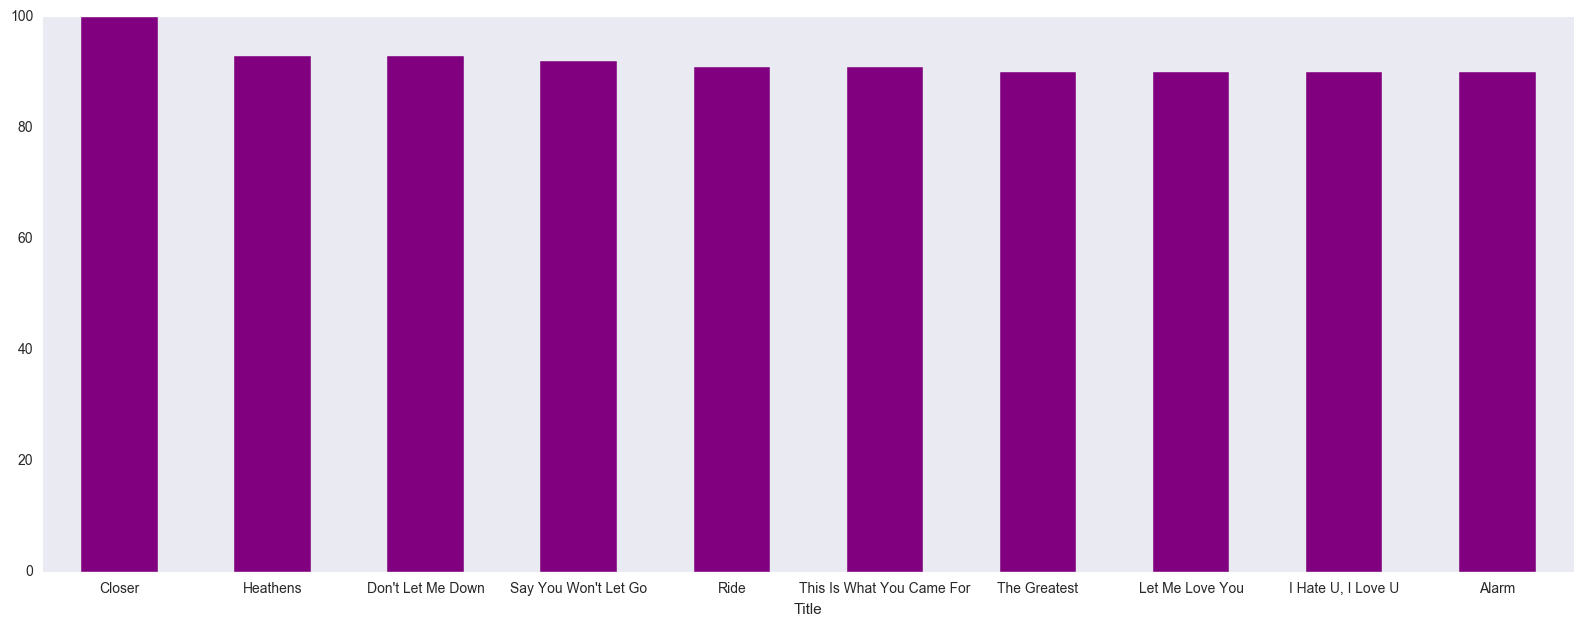

In [98]:
fig, ax = plt.subplots()
afp.plot(kind='bar', x='Title',y='popularity', color='purple', ax=ax,figsize=(16,8))
plt.tight_layout()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=360);
ax.legend_.remove()

In [31]:
# Correlation between various features
af_corr = af.corr()
af_corr

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.290821      0.142893     0.102623   
acousticness       -0.290821      1.000000     -0.330990    -0.209791   
danceability        0.142893     -0.330990      1.000000    -0.077653   
duration_ms         0.102623     -0.209791     -0.077653     1.000000   
energy              0.258728     -0.719404      0.300431     0.096258   
instrumentalness   -0.309189      0.048034     -0.016499    -0.007725   
key                 0.015772     -0.043203      0.009969     0.034078   
liveness           -0.065836     -0.028508     -0.094728     0.011247   
loudness            0.324382     -0.515177      0.208165     0.062326   
mode               -0.083490      0.114277     -0.105894    -0.091947   
speechiness         0.074887     -0.096479      0.162649     0.003895   
tempo               0.010469     -0.147109     -0.085809    -0.018970   
time_signature      0.086571     -0.204334      0.219536     0.027190   
valence             0.041148     -0.323771      0.563429    -0.208035   

                    energy  instrumentalness       key  liveness  loudness  \
popularity        0.258728         -0.309189  0.015772 -0.065836  0.324382   
acousticness     -0.719404          0.048034 -0.043203 -0.028508 -0.515177   
danceability      0.300431         -0.016499  0.009969 -0.094728  0.208165   
duration_ms       0.096258         -0.007725  0.034078  0.011247  0.062326   
energy            1.000000         -0.097118  0.041705  0.149718  0.752538   
instrumentalness -0.097118          1.000000  0.010874 -0.021372 -0.202172   
key               0.041705          0.010874  1.000000 -0.011487  0.025879   
liveness          0.149718         -0.021372 -0.011487  1.000000  0.075022   
loudness          0.752538         -0.202172  0.025879  0.075022  1.000000   
mode             -0.089197         -0.006248 -0.096246  0.033779 -0.062694   
speechiness       0.173511         -0.021649  0.034302  0.149266  0.093145   
tempo             0.209953         -0.009994  0.002542  0.029773  0.132249   
time_signature    0.224113         -0.019364  0.005346  0.000515  0.151086   
valence           0.505809         -0.028425  0.012420  0.055050  0.229163   

                      mode  speechiness     tempo  time_signature   valence  
popularity       -0.083490     0.074887  0.010469        0.086571  0.041148  
acousticness      0.114277    -0.096479 -0.147109       -0.204334 -0.323771  
danceability     -0.105894     0.162649 -0.085809        0.219536  0.563429  
duration_ms      -0.091947     0.003895 -0.018970        0.027190 -0.208035  
energy           -0.089197     0.173511  0.209953        0.224113  0.505809  
instrumentalness -0.006248    -0.021649 -0.009994       -0.019364 -0.028425  
key              -0.096246     0.034302  0.002542        0.005346  0.012420  
liveness          0.033779     0.149266  0.029773        0.000515  0.055050  
loudness         -0.062694     0.093145  0.132249        0.151086  0.229163  
mode              1.000000    -0.105188  0.018606       -0.014760 -0.010915  
speechiness      -0.105188     1.000000  0.121151        0.067418  0.172291  
tempo             0.018606     0.121151  1.000000       -0.034320  0.160039  
time_signature   -0.014760     0.067418 -0.034320        1.000000  0.193764  
valence          -0.010915     0.172291  0.160039        0.193764  1.000000

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(af_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(af_corr, mask=mask, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

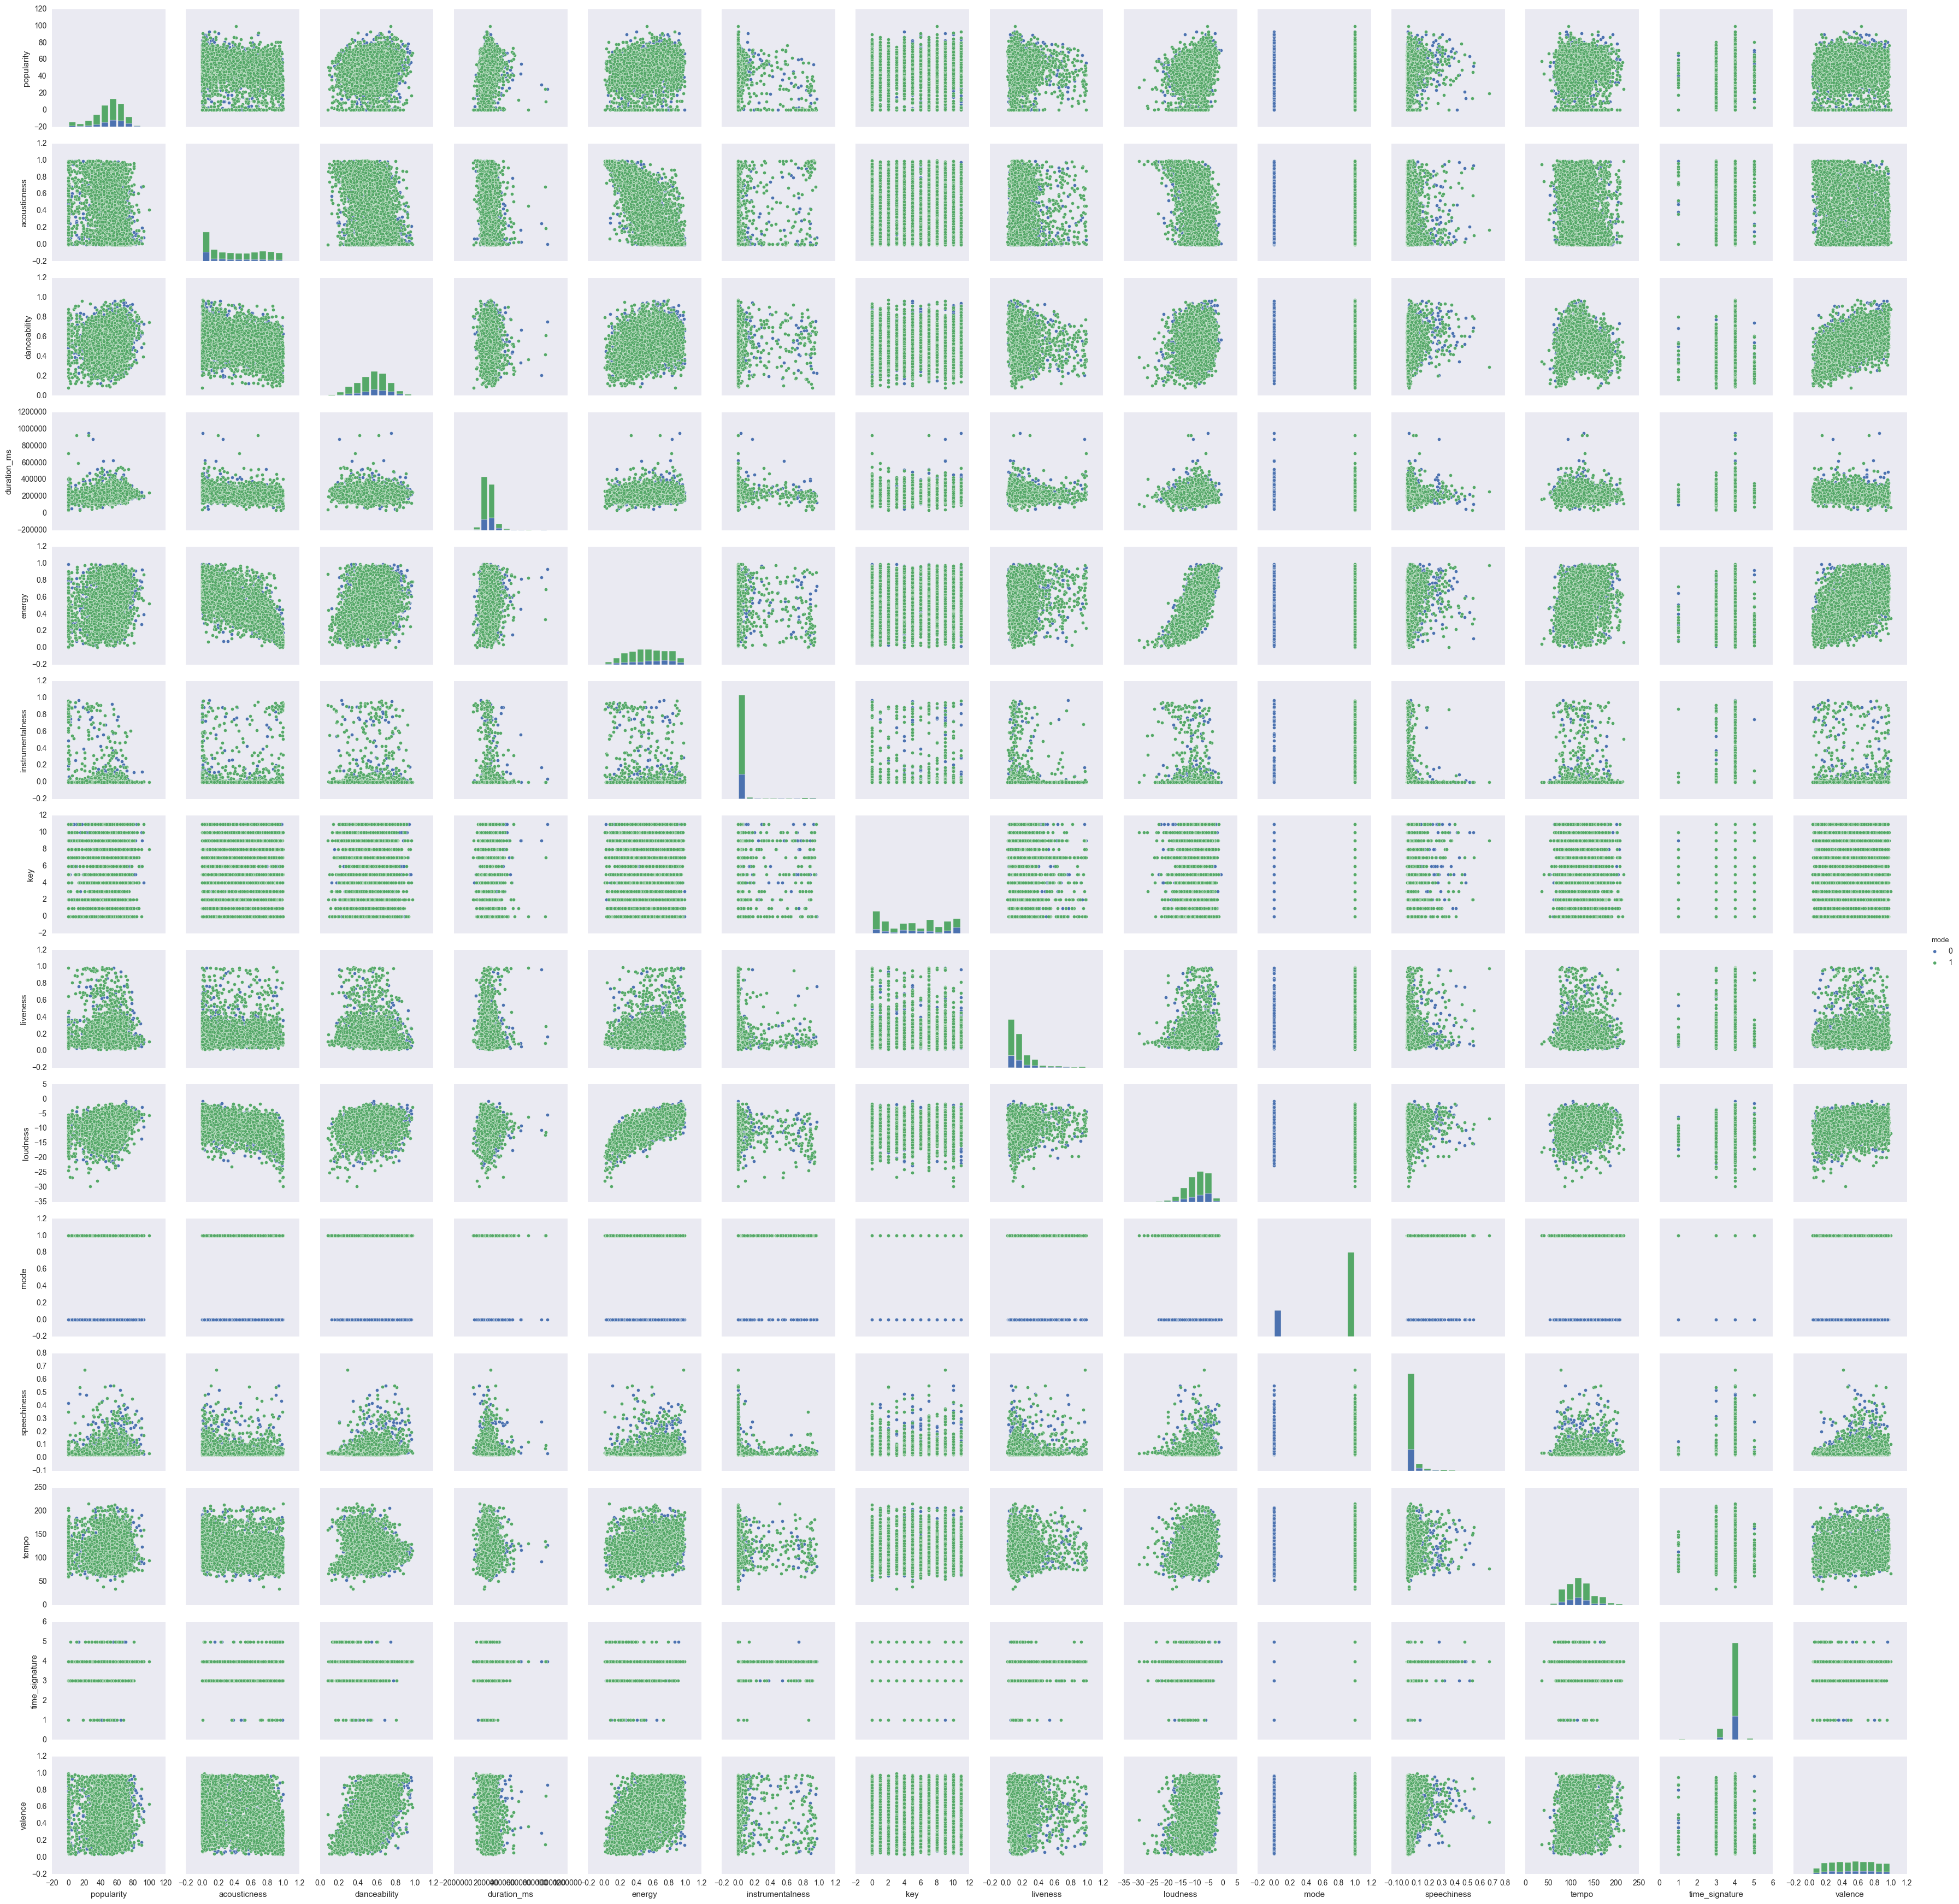

In [33]:
sns.set(style="dark")
sns.pairplot(af, hue='mode');

In [93]:
afe = af[['Title','Artist','energy']].sort_values('energy', ascending = False).head(10)
afe

Title              Artist  energy
2831               Holy Diver    Ronnie James Dio   0.994
3378       Spice Up Your Life         Spice Girls   0.993
1696            Ace Of Spades           Motörhead   0.991
766             Country Roads   Hermes House Band   0.990
1498                  Pokémon            Cartoons   0.990
1488  Rock and Roll Christmas    George Thorogood   0.990
2800      Jingle Bells (Bass)          Basshunter   0.989
1270           Last Christmas             Cascada   0.984
1691          Smooth Criminal     Michael Jackson   0.981
2259        Hey, Good Lookin'  Hank Williams, Jr.   0.980

In [36]:
fig, ax = plt.subplots()
afe.plot(kind='barh', x='Title',y='energy', color='darkblue', ax=ax)
plt.gca().invert_yaxis()
ax.legend_.remove()

In [94]:
afd = af[['Title','Artist','danceability']].sort_values('danceability', ascending = False).head(10)
afd

Title         Artist  danceability
66                  Ice Ice Baby    Vanilla Ice         0.978
2158                Hot In Herre          Nelly         0.965
1786               Humpty Dumpty  Nursery Rhyme         0.965
2628                    Anaconda    Nicki Minaj         0.965
3207                Just Lose It         Eminem         0.963
901                Kingston Town           UB40         0.956
1365  Another One Bites The Dust          Queen         0.951
817          The Real Slim Shady         Eminem         0.950
1485                 Bust A Move       Young MC         0.944
1835                     Jamming     Bob Marley         0.941

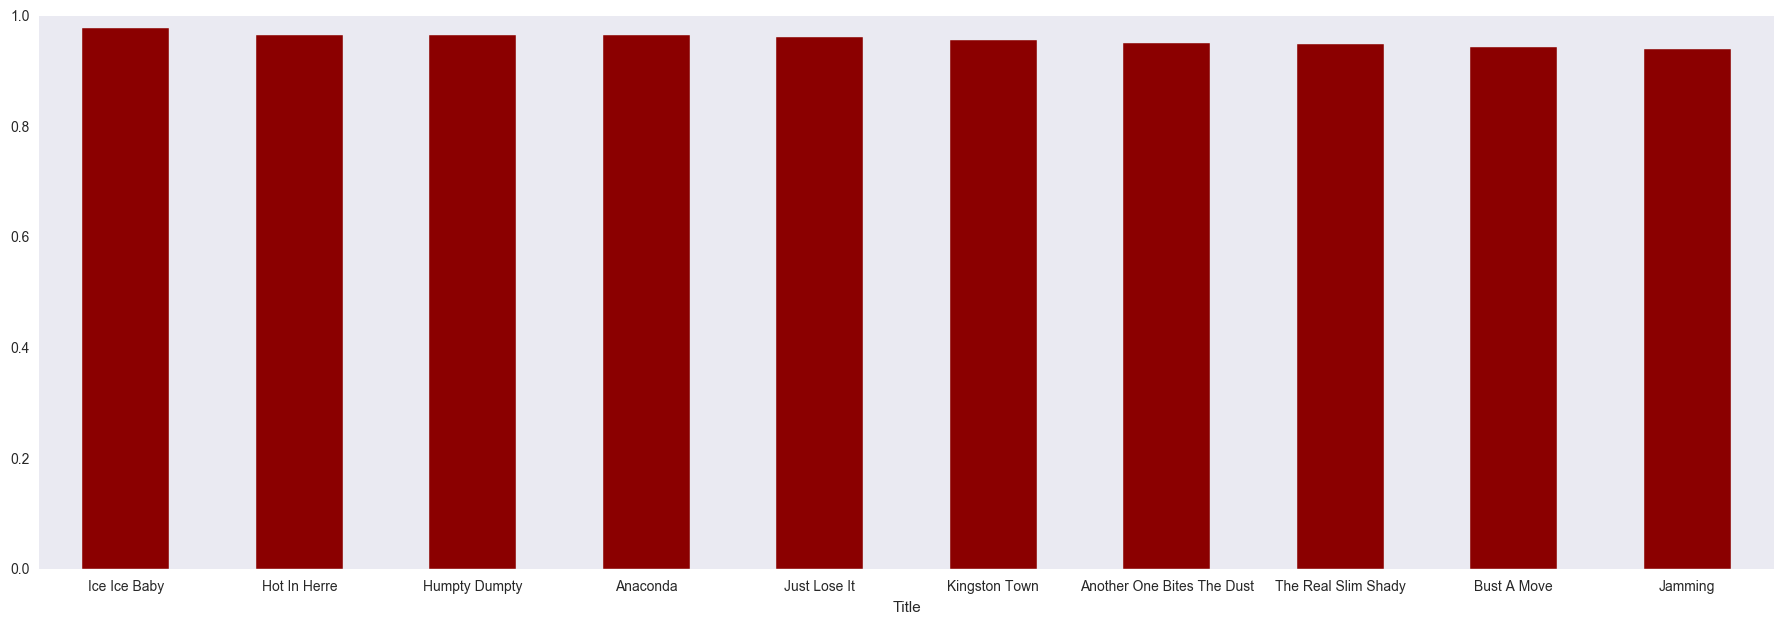

In [38]:
fig, ax = plt.subplots()
afd.plot(kind='bar', x='Title',y='danceability', color='darkred', ax=ax, legend=False, figsize=(18,8))
plt.tight_layout()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=360);

In [95]:
aft = af[['Title','Artist','tempo']].sort_values('tempo', ascending = False).head(10)
aft

Title              Artist    tempo
527                 Alphabet Song       Nursery Rhyme  216.126
78     You're The One That I Want              Grease  213.840
1631  Lovin', Touchin', Squeezin'             Journey  211.261
3266                  That's Life       Michael Bublé  209.648
1501                It's Too Late         Carole King  208.282
3613               It Hurt So Bad      Susan Tedeschi  207.934
3101                Love Yourself  Postmodern Jukebox  207.659
1330           Dancing In The Sky      Dani and Lizzy  207.508
773              Somethin' Stupid       Frank Sinatra  207.431
3042             Tom Jones Medley          De Toppers  207.185

In [43]:
fig, ax = plt.subplots()
aft.plot(kind='barh', x='Title',y='tempo', color='green', ax=ax)
plt.gca().invert_yaxis()
ax.legend_.remove()

# DATA MINING

In [45]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder

In [46]:
af.T

0                       1     \
Artist                            Frozen       Pharrell Williams   
Title                          Let It Go                   Happy   
id                0qcr5FMsEO85NAQjrlDRKo  6NPVjNh8Jhru9xOmyQigds   
popularity                            65                      74   
acousticness                       0.556                   0.286   
danceability                       0.539                   0.652   
duration_ms                       223840                  233305   
energy                             0.488                   0.757   
instrumentalness                       0                       0   
key                                    8                       1   
liveness                           0.122                  0.0886   
loudness                          -6.864                  -6.819   
mode                                   1                       1   
speechiness                       0.0318                   0.153   
tempo                            137.073                 159.911   
time_signature                         4                       4   
valence                            0.373                   0.962   

                                          2                       3     \
Artist            Mark Ronson feat. Bruno Mars            Taylor Swift   
Title                              Uptown Funk            Shake It off   
id                      5MjukdbL11ysj7TnEM2GPn  1j2sRZpFUzG6wPJGfRvet3   
popularity                                  10                      49   
acousticness                            0.0417                  0.0031   
danceability                             0.823                   0.598   
duration_ms                             271360                  217602   
energy                                   0.498                   0.909   
instrumentalness                             0                 0.00499   
key                                          0                       6   
liveness                                 0.107                  0.0734   
loudness                                -7.257                  -4.686   
mode                                         1                       1   
speechiness                              0.102                  0.0559   
tempo                                  115.046                 160.046   
time_signature                               4                       4   
valence                                  0.638                   0.966   

                                    4                       5     \
Artist                    Meghan Trainor              Ed Sheeran   
Title                All About That Bass       Thinking Out Loud   
id                0ifSeVGUr7py5GggttDhXw  34gCuhDGsG4bRPIf9bb02f   
popularity                            70                      84   
acousticness                      0.0476                   0.474   
danceability                       0.811                   0.781   
duration_ms                       188754                  281560   
energy                             0.879                   0.445   
instrumentalness                1.91e-06                       0   
key                                    9                       2   
liveness                           0.109                   0.184   
loudness                          -3.724                  -6.061   
mode                                   1                       1   
speechiness                       0.0514                  0.0295   
tempo                            134.064                  78.998   
time_signature                         4                       4   
valence                            0.962                   0.584   

                                    6                       7     \
Artist                      Taylor Swift               Sam Smith   
Title                        Blank Space            Stay With Me   
id                2muXrVYHVCUOuth8MePP3K  5Db9VId

In [47]:
x = af.iloc[:,4:]
X = StandardScaler().fit_transform(x)

In [48]:
af_norm = pd.DataFrame(X, columns=[x.columns])

In [49]:
sns.boxplot(af_norm)
plt.xticks(rotation=90) 

/Users/andrewjeong/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

# MODELING

In [126]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import cross_validation

### Vanilla Linear Regression

In [144]:
X = X
y = StandardScaler().fit_transform(af['popularity'])

/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [145]:

lm = linear_model.LinearRegression()
lm.fit(X,y)

pred = lm.predict(X)
print ("r2 = ",r2_score(y, pred))
print ("MSE =", mean_squared_error(y, pred))
print ("RMSE =", round(np.sqrt(mean_squared_error(y, pred)), 2))

print ()
print ("Coefficients:")

for i,j in zip(x.columns, lm.coef_):
    print (i, ':', j)

r2 =  0.217557714393
MSE = 0.782442285607
RMSE = 0.88

Coefficients:
acousticness : -0.187732645399
danceability : 0.0774491369549
duration_ms : 0.0330045381961
energy : -0.0251529529709
instrumentalness : -0.264771813443
key : -0.000233647968748
liveness : -0.0812992678767
loudness : 0.197401422509
mode : -0.0346777889044
speechiness : 0.0515384852365
tempo : -0.0197885886348
time_signature : 0.0159737882458
valence : -0.101154074173


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

ax = sns.regplot(pred, y)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
plt.annotate('r-squared = ' + str(round(r2_score(y, pred),2)), xy=(41,-7), fontsize=12)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values');

### Cross Validation - Lasso/ Ridge

In [150]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

#### Lasso

In [151]:
lasso = linear_model.Lasso(alpha=.01)
tts_model = lasso_tts.fit(X_train, y_train)

tts_lasso_r2 =  r2_score(y_true=y_test, y_pred=tts_model.predict(X_test))

print ('tts lasso r2:', tts_lasso_r2)

tts lasso r2: 0.181169368962


In [154]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5)

array([ 0.04297014,  0.10974543,  0.24158234,  0.20358209,  0.00247755])

In [155]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5).mean()

0.12007151097272824

In [156]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error')

/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

array([-1.20961188, -0.6827104 , -0.69146256, -0.59956089, -0.97343885])

In [157]:
cross_val_score(lasso, X, y, n_jobs=1, cv=5,
                scoring='mean_squared_error').mean()

/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/andrewjeong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight

-0.83135691374750142

#### Ridge

In [159]:
rcv = linear_model.RidgeCV(alphas=(.001, .001, .01, .1, .5, 1, 5, 10),store_cv_values=True,)

In [160]:
rcv_model = rcv.fit(X, y)

In [162]:
rcv_model.score(X, y)

0.21755585850544745

In [163]:
rcv_model.alpha_

10.0

In [164]:
abs(rcv_model.coef_).mean()

0.083446713705123146

In [165]:
cross_val_predict(rcv_model, X, y, cv=5)

array([-0.01696178,  0.11747965,  0.48398696, ...,  0.3059404 ,
       -0.13523557,  0.64440482])

## PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)

In [51]:
pca.explained_variance_ratio_

array([ 0.23530724,  0.10695845,  0.09414721,  0.08735605,  0.0784789 ,
        0.07683682,  0.07161607,  0.06621924,  0.06018519,  0.0523463 ,
        0.03151063,  0.02951802,  0.00951989])

In [52]:
cumulvarExpl = pca.explained_variance_ratio_.cumsum()
cumulvarExpl

array([ 0.23530724,  0.34226568,  0.43641289,  0.52376894,  0.60224784,
        0.67908466,  0.75070073,  0.81691997,  0.87710516,  0.92945146,
        0.96096209,  0.99048011,  1.        ])

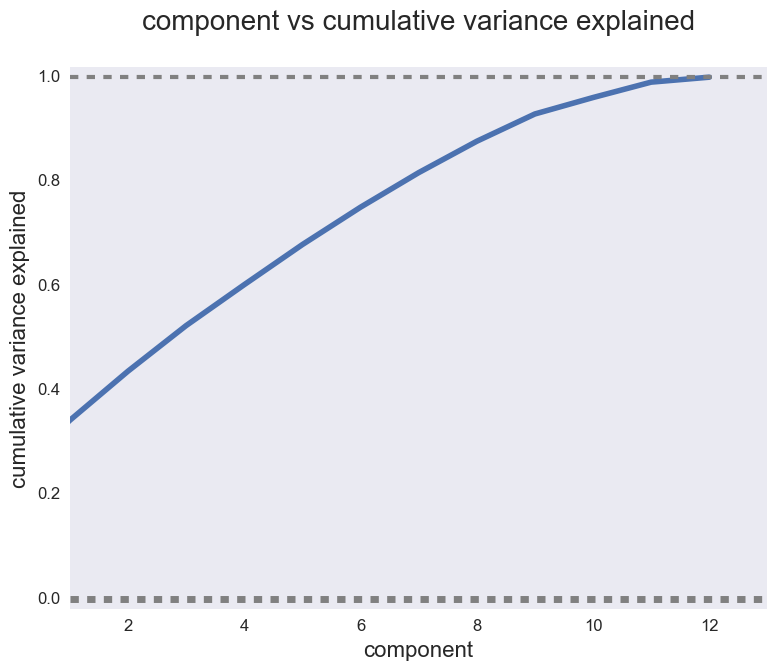

In [53]:
plt.figure(figsize=(9,7))

component_number = range(13)

plt.plot(component_number, cumulvarExpl, lw=4)

plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=3, color='grey', ls='dashed')


ax = plt.gca()
ax.set_xlim([1,13])
ax.set_ylim([-.02,1.02])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [54]:
Xt = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
Xt.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.333809  0.387769 -0.049529 -0.404076 -0.598277 -0.452278 -0.746897   
1 -2.102316 -0.763552 -1.260311  0.056020 -0.362455  0.428267  1.413935   
2 -1.365425 -0.637567  0.331456 -0.786878  0.632743  0.704275  1.379038   
3 -2.716226 -0.082016 -0.656965 -0.639628 -1.441093  0.015267 -0.187556   
4 -3.014537 -0.945610  0.019068 -0.470308 -0.990905 -0.569352 -0.964359   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.701272 -0.099733 -0.207102  0.618481 -0.559218  0.051384  
1 -1.135445  0.798221 -0.181226  0.332833  0.587422  0.101452  
2 -0.395879  1.243036  0.006579 -0.191328 -0.802436  0.565578  
3 -0.473362  0.185367  0.091205 -0.027295  0.605761  0.103858  
4  0.080358  0.532007  0.015328  0.256659 -0.176779  0.039923

In [55]:
fig = plt.figure(figsize=(15,8))

ax = fig.gca()
ax = sns.regplot(Xt.iloc[:,0], Xt.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

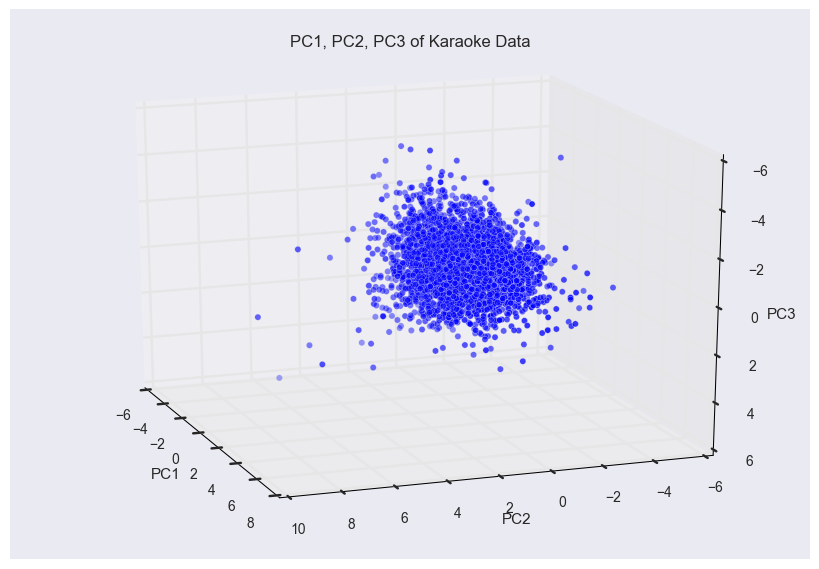

In [56]:
from mpl_toolkits.mplot3d import Axes3D

plt.close('all')
fig1 = plt.figure()
ax = Axes3D(fig1)
ax.scatter(xs = Xt['PC1'], ys = Xt['PC2'], zs = Xt['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PC1, PC2, PC3 of Karaoke Data')

ax.azim = 200
ax.elev = 199

plt.show()

## K-MEANS FROM PCA

In [57]:
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics

In [58]:
k = 10
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(Xt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [60]:
centroids

array([[ 1.51462251, -1.20613631,  0.82144956,  1.77516583, -1.64670124,
         4.12638832, -0.75545044,  1.06489441, -0.329109  , -0.98127079,
         0.29461909, -0.08957519,  0.06210538],
       [-1.50791044, -0.4099833 ,  0.05147938, -0.73056127, -0.05753972,
         0.07144693, -0.30168669,  0.11752646,  0.40062622, -0.03844745,
        -0.09239661,  0.02897644, -0.04340978],
       [ 2.24800155,  0.09043624,  0.41168618, -0.1330456 ,  0.45476453,
        -0.19584169, -0.16206983, -0.68104447, -0.43922018, -0.06013894,
         0.02194561,  0.0687939 , -0.00598764],
       [-1.11684403,  0.52159233, -1.20795841, -0.01658415, -1.00793767,
         0.02317447,  0.01506319, -0.68836465, -0.32317179,  0.00685501,
         0.0064634 ,  0.15567829,  0.00630007],
       [-1.31917562,  0.18065452,  1.10211136,  0.62870249, -0.10517087,
        -0.47610913,  0.58325759,  0.41633219, -0.7841452 ,  0.20713687,
        -0.00978952,  0.04251845, -0.02935139],
       [ 2.38186618,  0.720980

In [61]:
inertia

25601.490298295241

In [62]:
# silhouette score change based on k (plot)

metrics.silhouette_score(Xt, labels, metric='euclidean')

0.12309422084807307

In [63]:
Xt['cluster']= pd.Series(labels)

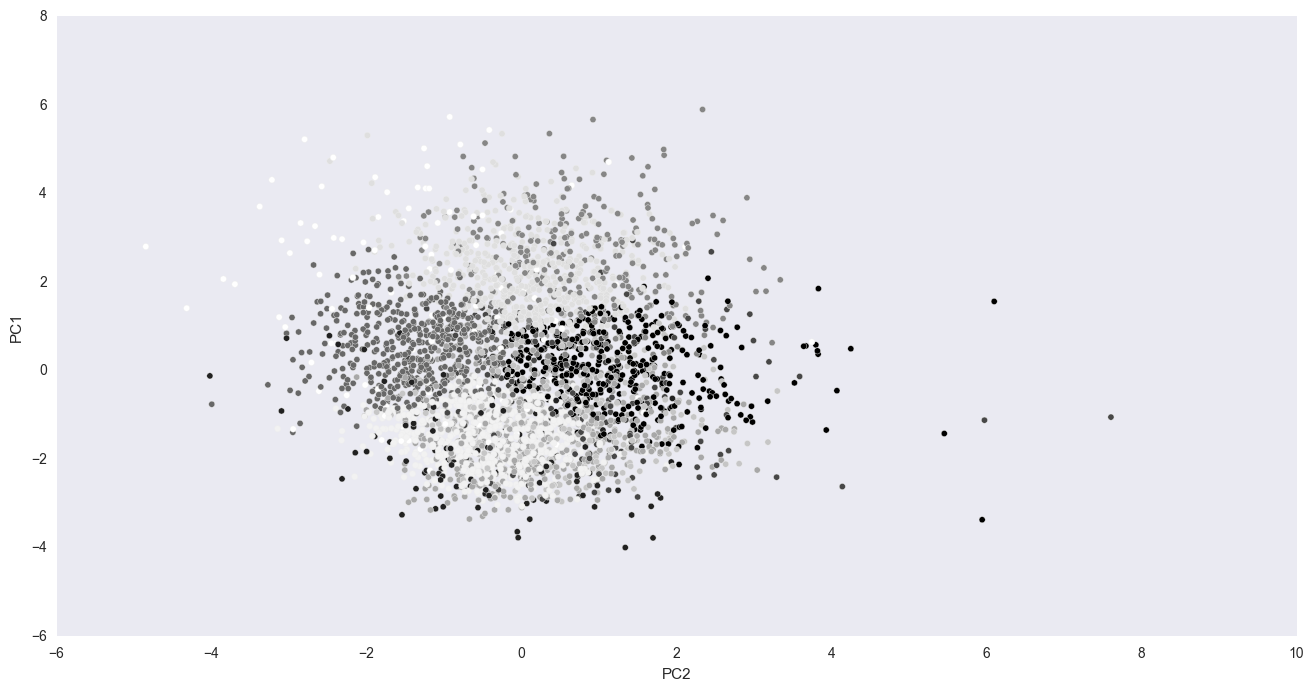

In [64]:
Xt.plot(kind='scatter', x='PC2',y='PC1', c=Xt.cluster.astype(np.float),figsize=(16,8))

In [106]:
km_s = Xt.plot(kind='scatter', x='PC2',y='PC1', c=Xt.cluster.astype(np.float),figsize=(30,15))
for i, a in enumerate(af['Title']):
    km_s.annotate(a, (Xt.iloc[i].PC2, Xt.iloc[i].PC1))

## DBSCAN

In [75]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [76]:
db = DBSCAN(eps=0.3, min_samples=14)

In [77]:
db.fit(Xt)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=14, n_jobs=1, p=None)

In [78]:
core_samples = db.core_sample_indices_
dblabels = db.labels_

In [79]:
silhouette_score(Xt, dblabels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

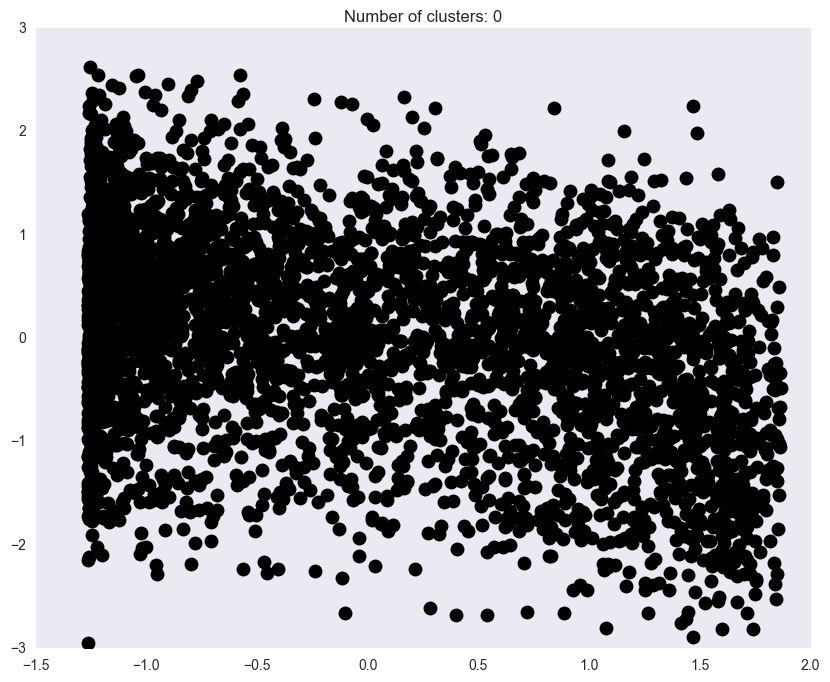

In [80]:
def plot_dbscan(db, Xt):
    fig = plt.figure(figsize=(10,8))
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)
        

    plt.title('Number of clusters: %d' % n_clusters_);
    
plot_dbscan(db, Xt)

## HIERARCHICAL

In [82]:
from scipy.cluster import hierarchy
from scipy.spatial import distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial import distance as ssd
from scipy.spatial.distance import pdist

In [83]:
Z = linkage(pdist(Xt), 'ward')

In [84]:
c, coph_dists = cophenet(Z, pdist(Xt))
c

0.6023118575447205

([], <a list of 0 Text xticklabel objects>)

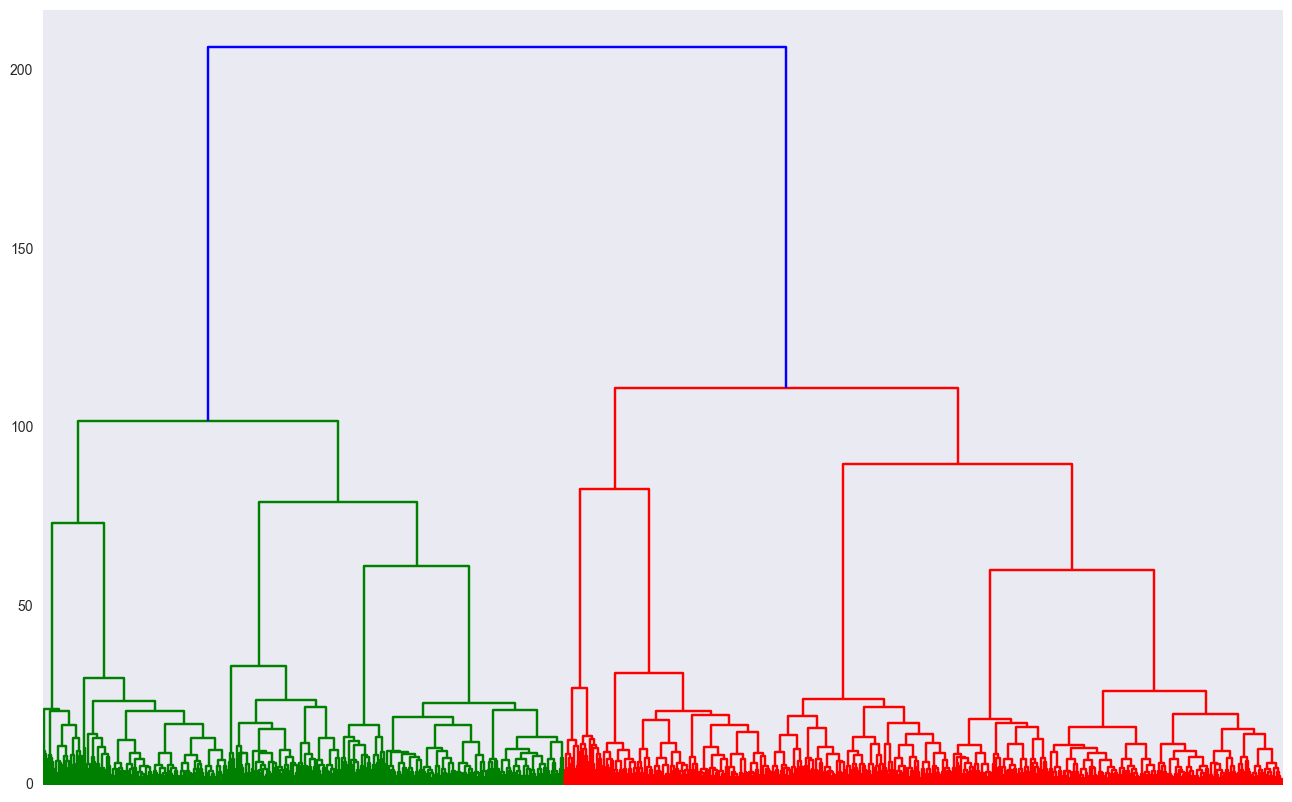

In [85]:
fig, ax = plt.subplots(figsize=(16,10))
dn = hierarchy.dendrogram(Z)
plt.xticks([])